decompressing run_00001.h5...
decompession done
all done, ready
file open H5 dt=0.03


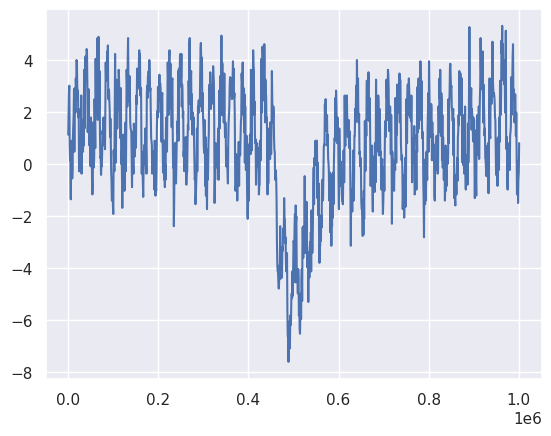

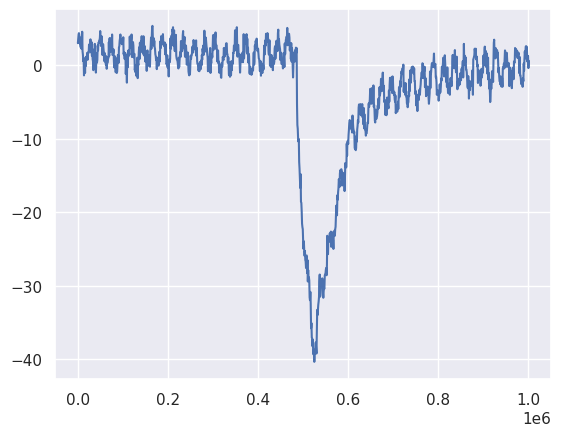

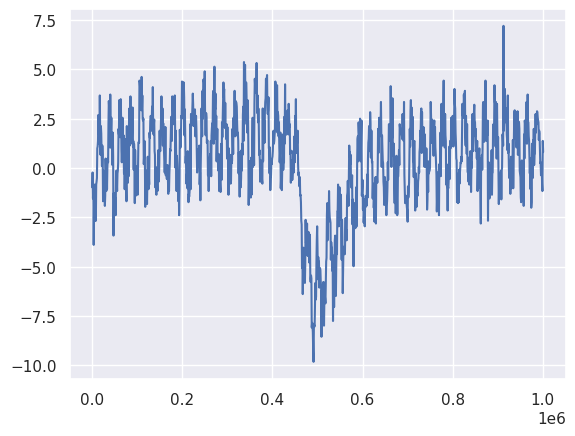

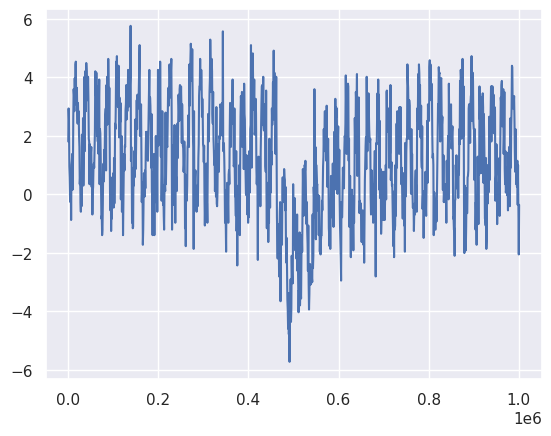

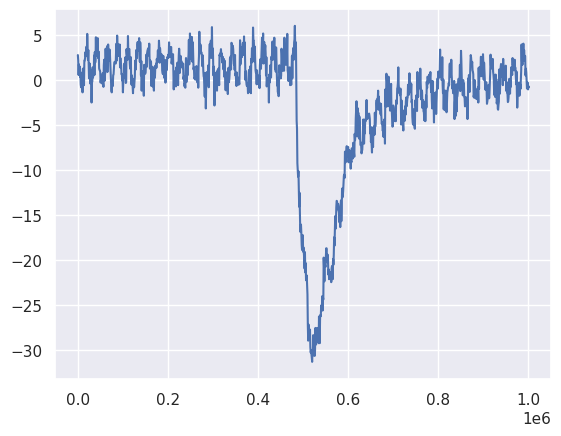

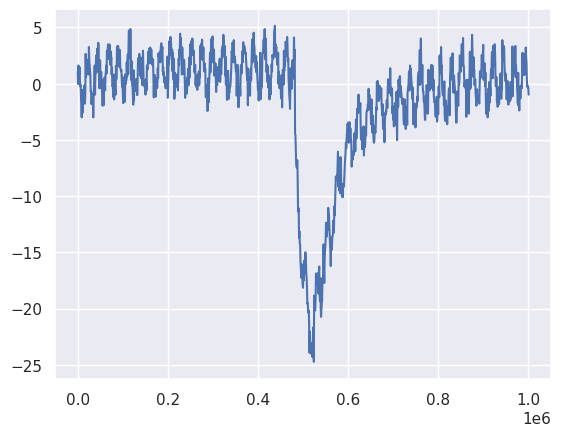

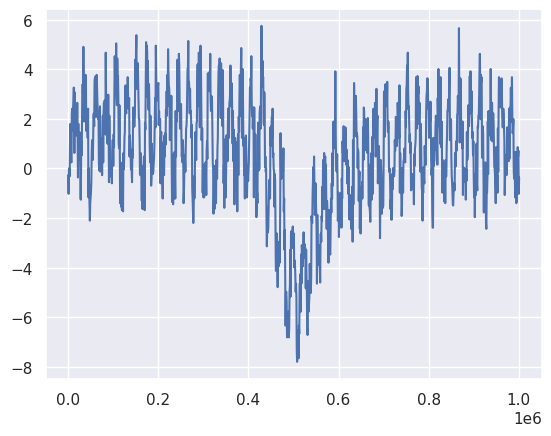

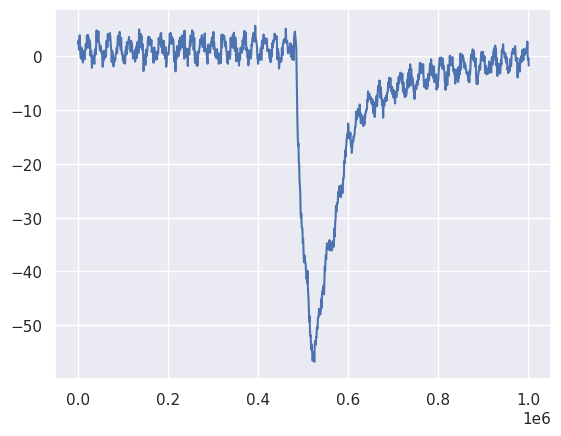

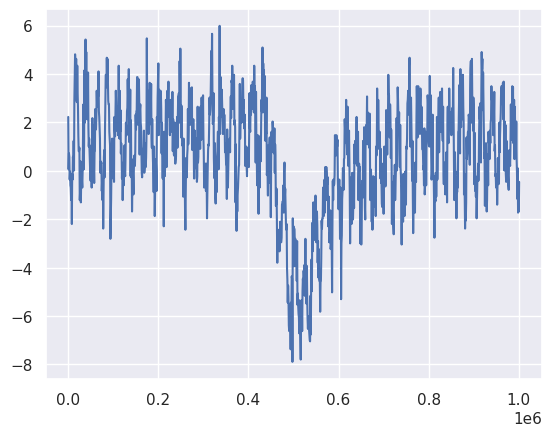

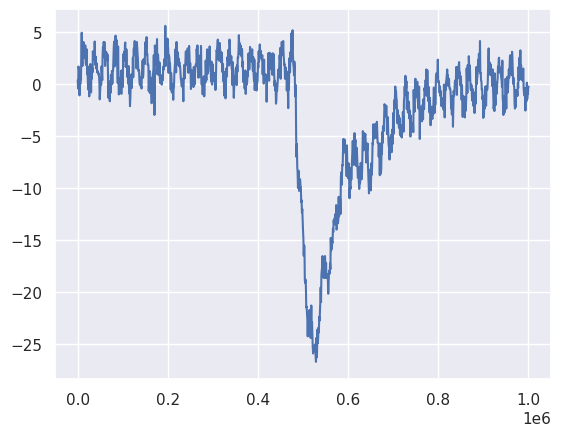

deleting uncompressed
file uncompressed removed
DONE


In [2]:
### ! cygno default folder
#################################
%run init.ipynb
runs = [1]
path='/home/jovyan/work/data/cygno/'
col  = ('y-', 'm-', 'c-', 'g-', 'k-', 'b-', 'r-')
WN = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8']
#################################

ch2read = [1, 0 , 0, 0, 0 , 0, 0, 0] # 0 non mostra; 1 mostra il segnale; -1 inverte
start = time.time()
for r, run in enumerate(runs):
    # filename = decompress_run(run, path)
    rmcomp=False
    filename = 'run_{:05d}.h5'.format(run)
    if not os.path.exists(path+filename):
        if not decompress_run(run, path) == '':
            rmcomp=True
        else:
            print("ERROR: there is neither the", filename, "file nor the compressed one!")
            break
    with h5py.File(path+filename, 'r') as hdf_file:
        print('file open H5 dt={:.2f}'.format(time.time()-start))
        for group_name in hdf_file:
            data_event = {}
            group = hdf_file[group_name]
            group_data = {}
            for dataset_name in group:
                dataset = group[dataset_name]
                if isinstance(dataset, h5py.Dataset) and dataset.shape == ():
                    group_data[dataset_name] = dataset[()]
                else:
                    group_data[dataset_name] = dataset[:]
            data_event[group_name] = group_data
            wavedesc = json.loads(data_event[group_name]["H1"])
            for w in range(wavedesc['SUBARRAY_COUNT']):
                for i, val in enumerate(ch2read):
                    if val:
                        x = np.array(json.loads(data_event[group_name][WN[i]])[w]['Time (s)'])*1e9
                        y = val*np.array(json.loads(data_event[group_name][WN[i]])[w]['Amplitude (V)'])/1e-3
                        plt.plot(x,y)
                        # par,err, integ, ax[i] = time_fit(x, y, val, ax[i], col[i])

            plt.show()
        if rmcomp:
            remove_when_done(run, path)
print ('DONE')
